PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#INTRODUCCIÓN

Esta es la primera práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [1]:
#importamos la base de datos
import pandas as pd #pandas
df_raw=pd.read_csv('airbnb.csv',encoding='latin-1')
df_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Se observa que se ha cargado de manera correcta. 

Importamos así también todas las librerías necesarias para ejecutar esta práctica. 

In [2]:
#importamos todas las librerías necesarias: 
import sklearn #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
import seaborn as sns
import numpy as np #NumPy
from matplotlib.cbook import boxplot_stats 

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 


#EJERCICIO 1

## Comprensión del negocio y definición del problema

Esta práctica se basa en una base de datos de una empresa llamada AirBnB, y servirá de indicador para ver cómo se transforma la ciudad.

El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respecto a los demás que forma New York?

Para medir la popularidad/calidad del barrio, tendremos primero en cuenta el número de apartamentos de calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos”. Para ello primero haremos un par de transformaciones de los datos. La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. Para la columna que indica el número de días que está disponible asignaremos las etiquetas de menor valor a mayor de la siguiente manera: “Poco disponible”, “Disponible normalmente” y “Altamente disponible”. Finalmente crearemos una columna para clasificar los apartamentos, teniendo en cuenta una serie de reglas, que se explicarán más adelante. 

## Comprensión de los datos

La base de datos que utilizaremos consta de 48895 observaciones. En cada observación recopilamos los siguientes atributos: 
- id: id del apartamento en cuestión. 
- name: nombre del apartamento
- host_id: id del anfitrión 
- host_name: nombre del anfitrión 
- neighbourhood_group: estado al que pertenece
- neighbourhood: barrio al que pertenece 
- latitude: coordenadas de latitud
- longitude: coordenadas de longitud 
- room_type: tipo de habitación 
- price: precio en dólares
- minimum_nights: noches mínimas que te puedes hospedar
- number_of_reviews: número de reseñas 
- last_review: última reseña 
- reviews_per_month: reseñas por mes
- calculated_host_listings_count: cantidad de propiedades que un anfitrión tiene disponibles en la plataforma
- availability_365: días disponibles por año. 


Se ha investigado esta base de datos en kaggle para entender mejor cada variable, pero no lo explican con claridad, y cabe rebundancia, por lo que se explicará la interpretación que se le ha dado a cada una. 

availability_365: suponemos que la propiedad está dispuesta en la plataforma los 365 días del año, es decir, cualquier mes está disponible. Obviamos que sea una casa de verano que sólo se alquile los meses de junio y julio por ejemplo, para definirlo bien, se podrá alquilar los 12 meses del año. 

## Preparación de los datos

Estudiamos a ver si encontramos alguna fila duplicada, ya que sería aumentar el coste computacional sin aportar ninguna información nueva. 

In [3]:
duplicados = df_raw.duplicated()

# Contar el número total de filas duplicadas
num_duplicados = duplicados.sum()

print("Número de filas duplicadas:", num_duplicados)

Número de filas duplicadas: 0


Ahora debemos tratar la base de datos para así estudiar qué hacer con los datos NaN que encontraremos. 

Analizamos cuántos datos NaN hay en la columna 'reviews_per_month', ya que la trataremos posteriormente, y deberemos conocer el contenido de esta. 


In [4]:
reviews_per_month_nan = df_raw['reviews_per_month'].isna().sum()
print(reviews_per_month_nan)

10052


Ahora bien, vemos que hay 10052 datos NaN en la columna. Observemos cuántos datos hay en total para barajar las distintas opciones de qué hacer con estos datos NaN. Si es poca cantidad comparado con la cantidad de observaciones en total, podremos eliminar directamente esas observaciones, sin embargo, si suponen gran cantidad, podríamos buscar otras opciones, como rellenar con la media para así no afectar al equilibrio del resto de datos. 

Es verdad que como hablamos de reseñas por mes, sería factible convertir esos NaN en 0, para que así a la hora de categorizar la columna, lo detecte como Bajo. 

¿Por qué rellenamos con 0's? Encontramos un NaN en la columna de 'reviews_per_month', cuando en la columna de 'number_of_reviews' aparece un 0, o un NaN directamente, es decir, que anteriormente no se ha hecho ninguna reseña, por lo que obviamente, en el último mes, tampoco. No deberíamos rellenar con la media, ya que ahí estamos aportando una cierta cantidad de reseñas que no se han hecho. 

In [5]:
num_observations = df_raw.shape[0]
print(num_observations)

48895


Supone un 20% de los datos totales. No resulta útil borrarlos, si no que deberíamos rellenar con 0 como hemos explicado. 

Ahora debemos estudiar la distribución de esta, para ello haremos uso de boxplot, representando así cada apartamento para ver si hay outliers o datos rebundantes. 

Rellenamos con 0's ahora, para que cuando se realice el boxplot a continuación, esos 0 se tengan en cuenta a la hora de obtener los valores estadísticos. 

In [6]:
df_raw=df_raw.assign(reviews_per_month = df_raw['reviews_per_month'].fillna(0)) 

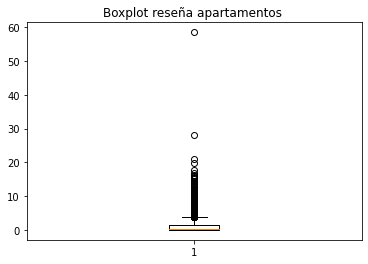

In [7]:

boxplot_reviews=df_raw['reviews_per_month']
plt.boxplot(boxplot_reviews)
plt.title('Boxplot reseña apartamentos ')
plt.show()

In [8]:

stats = boxplot_stats(boxplot_reviews)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))
            

-2.27 3.89 3312


Con esta información interpretamos que tenemos 3312 outliers, y que de valor máximo aceptado, se obtendrá 3,89, y mínimo lo interpretamos como 0, ya que no vamos a encontrar valores negativos en el número de reseñas por mes. 


Ya nos hemos asegurado que no nos quedad ningún dato NaN, así no encontraremos ningún error a la hora de categorizar la columna, que es el siguiente paso. 

Lo categorizamos en tres: Baja, Media y Alta. 

Considerando que según los rangos intercuartiles hemos obtenido que el máximo valor que se considera aceptable es 3,89, y que el outlier mayor que se puede conseguir es 60, no podemos hacer los rangos teniendo en cuenta el mayor que se pueda tomar, si no el mayor aceptado. Es por ello que para definir cada uno,tendremos en cuenta el rango intercuartilíco: [0-3.89] 

Por lo que: 
- [0-1.3) = 'Baja'
- [1.3 - 2.6) = 'Media'
- [2.6 - 60) = 'Alta' (si no encontrásemos outliers, terminaría en 3.89, pero lo que vamos a hacer es simplemente ignorar esos outliers)

Por otro lado, vamos a clasificar los alquileres en función de los días que están disponibles. 

Para ello, siguiendo el patrón anterior, calculamos si hay NaN en la columna correspondiente: 


In [9]:
disponibilidad_nan = df_raw['availability_365'].isna().sum()
print(disponibilidad_nan)

0


No hay ningún NaN en dicha columna, por lo que no hace falta tratarlos. En el caso de encontrarlos, se tendría que estudiar qué hacer con este conjunto de datos de manera independiente. 



Ahora pasamos a estudiar de la misma manera la distribución de esta variable, gracias al uso de Boxplot.

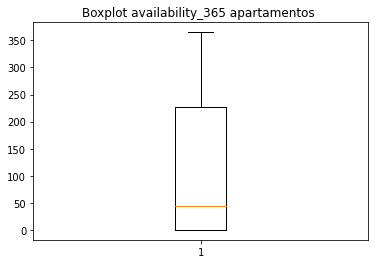

In [10]:
import matplotlib.pyplot as plt
boxplot_availability_365=df_raw['availability_365']
plt.boxplot(boxplot_availability_365)
plt.title('Boxplot availability_365 apartamentos ')
plt.show()

In [11]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_availability_365)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

-340.5 567.5 0


Según este modelo, no encontramos ningún outliers, por lo que podemos continuar. 

Es importante mencionar el valor máximo aceptado obtenido, y es que es 567.5, cuando en un año contamos con 365 días (en el caso de que no sea bisiesto). 
Es por ello que nos faltaría información para interpretar este máximo, ya que lo podríamos contar con que hay una serie de apartamentos se pueden alquilar durante 4 horas, por lo que un apartamento puede tener varias reseñas al día, o que durante una estancia, todos los usuarios que se hayan quedado puedan poner una reseña. 

Por lo que una vez hemos estudiado cada variable y sus outliers, podemos proceder con el ejercicio. 
Tal y como nos dice, para medir la popularidad/calidad del barrio, necesitaremos hacer uso de una clasificación, que tomará como factores a estudiar la cantidad de reseñas al mes ('reviews_per_month') y la disponibilidad de este ('availabilty_365'). 
Pero debemos definir estas variables en rangos, tal y como se ha explicado anteriormente. 



 Poco disponible | Disponible normalmente | Altamente disponible
-----:|:--------:| -------
Bueno | Regular | Malo
Bueno | Regular | Malo
Muy bueno | Bueno | Muy Malo




Donde cada fila depende del valor de la reseña en Baja, Media y Alta respectivamente.

La siguiente celda es una función para la nueva variable 'classification'.

In [12]:
def etiqueta_calidad(row):  
    if row[1]=='Poco disponible' and row[0]=='Baja': 
        return 'Bueno'
    if row[1]=='Poco disponible' and row[0]=='Media':
        return 'Bueno'
    if row[1]=='Poco disponible' and row[0]=='Alta':
        return 'Muy bueno'
    if row[1]=='Disponible normalmente' and row[0]=='Baja':
        return 'Regular'
    if row[1]=='Disponible normalmente' and row[0]=='Media':
        return 'Regular'
    if row[1]=='Disponible normalmente' and row[0]=='Alta':
        return 'Bueno'
    if row[1]=='Altamente disponible' and row[0]=='Baja':
        return 'Malo'
    if row[1]=='Altamente disponible' and row[0]=='Media':
        return 'Malo'
    if row[1]=='Altamente disponible' and row[0]=='Alta':
        return 'Muy malo'
    return 'N/A'

Volveremos a clasificarlos en una nueva variable llamada 'classification_num', que se regirá a partir de las nuevas reglas proporcionadas, pero con un ligero cambio, y es que cada rango va a pasar a obtener un valor, tal que así: 
- muy malo: 0
- malo: 0.25
- regular: 0.5 
- bueno: 0.75 
- muy bueno: 1 

Esto se usará en el ejercicio 2 más adelante, pero por el momento, lo hacemos ahora también. 

De esta manera, podremos obtener una media de la clasificación por barrios, que será necesario más adelante, ya que con categorías, no se pueden hacer correctamente dichos cálculos. 

In [13]:
df = (df_raw
 #.pipe(fillna_0) #llamamos a la función para rellenar con 0
 .assign(availability_365_range= 
        lambda df_: pd.cut(df_['availability_365'],bins=3,labels=['Poco disponible','Disponible normalmente','Altamente disponible'])) 
        #dividimos la variable 'availability_365' en 3 rangos iguales, tal y como se ha explicado anteriormente. 
 .assign(reviews_per_month_cat = 
        lambda df_: pd.cut(df_['reviews_per_month'],bins=[-0.1,1.3,2.6,60],labels=['Baja','Media','Alta']))
        #dividimos la variable 'reviews_per_month' en 3 rangos, tal y como se ha justificado.
 .assign(classification = 
         lambda df_: df_[['reviews_per_month_cat','availability_365_range']].apply(lambda x: etiqueta_calidad(x),axis=1))
        #llamamos a la función 'etiqueta_calidad' para la nueva variable de clasificación
 .assign(classification_num = 
         lambda df_: df_['classification'].map(lambda x: 1 if x=='Muy bueno' else 0 if x=='Muy malo' else 0.25 if x=='Malo' else 0.5 if x=='Regular' else 0.75))
        #clasificamos numéricamente los rangos, según la variable de 'classification', tal y como se ha explicado
)

Comprobamos lsi todo se ha ejecutado correctamente, para ello contaremos los posibles 'N/A' en la variable de 'classification'

In [14]:

classif_nan = df['classification'].isna().sum()
print(classif_nan)

0


Hacemos la misma comprobación en la variable de 'reviews_per_month_cat'

In [15]:
df.query('reviews_per_month_cat=="N/A"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_range,reviews_per_month_cat,classification,classification_num


Obtenemos el valor deseado. Ahora, gracias a la función '.value_counts', compararemos las dos columnas 'classification' y 'classification_num', ya que deberán tener el mismo número de apartamentos en cada rango o valor corresponidentemente. 

In [16]:
df['classification'].value_counts()

Bueno        29036
Malo          9474
Regular       4971
Muy bueno     3413
Muy malo      2001
Name: classification, dtype: int64

In [17]:
df['classification_num'].value_counts()

0.75    29036
0.25     9474
0.50     4971
1.00     3413
0.00     2001
Name: classification_num, dtype: int64

Todo se ha ejectuado correctamente, podemos continuar con el ejercicio. 

## Modelado


Una vez hemos preparado los datos tal y como deseamos, procedemos a modelar y estudiar el objetivo. Vamos a ver cuántos barrios hay, y cuántos apartamentos encontramos en los más populares. 

In [18]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Primero observamos que Williamsburg es donde más apartamentos encontramos.


Debemos comprobar que cada apartamento tiene un barrio asociado, así podemos descartar futuros problemas. 

In [19]:
neighbourhood_nan = df['neighbourhood'].isna().sum()
print(neighbourhood_nan)

0


Debemos ordenar los barrios según la popularidad/calidad. Para ello, según las indicaciones que nos dan, tendremos primero en cuenta el número de apartamentos de calidad según los usuarios. Definimos un apartamento de calidad, aquellos cuya clasificación sea considerada como Buena o Muy buena, esto se traduce a que la variable 'classification' deberá tener el valor "Bueno" o "Muy bueno". 
A partir de ahí, tendremos en cuenta la cantidad de apartamentos que tenga el barrio. Será un barrio más popular aquel que cuente con mayor cantidad de apartamentos. Para ello ordenaremos según los 'id', ya que cada apartamento tiene un id, y así podremos contarlos.  

La ordenación y agrupación de estos criterios, tendrá lugar en la variable x_barrios. 

Una vez tengamos esta variable, simplemente tendremos que buscar en qué lugar se ostenta el barrio 'Williamsburg' con respecto a los demás que forma New York, satisfaciendo así nuestro objetivo.

In [20]:
x_barrios = list(df
 .groupby(['neighbourhood','classification']).id
 .count()
 .reset_index()
 .query('classification in ["Bueno","Muy bueno"]')
 .groupby('neighbourhood')
 .sum()
 .sort_values(by='id',ascending=False)  
 .index[:5] 
)

Hemos tomado los 5 primeros para poder observar si se ha ejecutado correctamente. 

In [21]:
x_barrios

['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'East Village']

##Evaluación


Ya hemos alcanzado el objetivo que buscábamos, el barrio 'Williamsburg' ostenta la primera posición en términos de popularidad/calidad. 

##Despliegue

In [22]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Para explotar la utilidad de este modelo (Call to Action), debemos estudiar el resultado obtenido. 
¿Para qué puede servir esto? Si un particular busca aumentar el beneficio de alquilar su propiedad, podrá tener en cuenta este estudio, para según en qué barrio se localiza, estudiar el precio de su apartamento. 

Pongamos un par de ejemplos: 

Si el apartamento se localiza en el barrio de 'Williamsburg' deberá adecuar el precio, según el resto de apartamentos, teniendo en cuenta que de media, los apartamentos en esa zona, tienen buena calificación, y que disponen de gran cantidad, por lo que si eleva mucho el precio, nadie estará dispuesto a pagarlo, teniendo otras opciones con la misma clasificación, y un precio más adecuado.

Sin embargo si el apartamento se encuentra en el barrio 'Rossville' podrá aumentar el precio por noche, ya que como se observa, es el único apartamento que se encuentra en ese barrio, no tendrá competencia. Si alguien se necesita hospedar ahí, sólo tendrá esa opción. 


#EJERCICIO 2

## Comprensión de los negocios y definición del problema:

 Explica visualmente como se distribuyen los 5 barrios más populares (esto serán aquellos cuyos apartamentos estén más solicitados en números absolutos. Para ello utiliza un diagrama de burbuja donde el eje de las X indica el barrio y el eje Y la calidad de los apartamentos. Usa todos los diagramas que necesites para llegar a esta conclusión final.

La selección de los 5 barrios más populares ya se realizó en el ejercicio anterior, y se definió en la variable de x_barrios, por lo que lo próximo será representarlos para estudiar las distribuciones de estos. 

Consideramos que las secciones de comprensión de los datos y preparación, ya se realizó en el ejercicio anterior, y no hace falta repetirlo.

Encontramos distintas opciones para estudiar la distribución de estos barrios. Se hará mediante un bubble sort el cual tomará los siguientes valores: 
- x: los 5 barrios más populares 
- y: la callidad de los apartamentos 

Primero estudiaremos cómo se distribuye cada barrio según la variable de 'classification' es decir, sin hacer la media. 

Pero debemos definir qué variable definirá el tamaño de las burbujas del diagrama (size). Para ello dispongamos de varias opciones, y definamos cuál puede ser la mejor. 
- 'availabilty_365': Según definimos anteriormente, un apartamento estará disponible en la web de AirBnB los 365 días del año, y esta variable nos indicará cuántos días está disponible. 
- Cantidad de apartamentos por barrio: El tamaño de cada bubble será la suma de apartamentos por clasificación y por barrio. 

Nos decantaremos más por la segunda opción, ya que consideramos que será información más útil. 

## Modelado

Agrupamos por barrio (sólo los 5 más populares) y clasificación. 

In [23]:
df_draw = (df 
           .query('neighbourhood in @x_barrios')
           .groupby(['neighbourhood','classification']).id
           .count()
           .reset_index()
          )

Text(0.5, 0.92, 'Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por categoría')

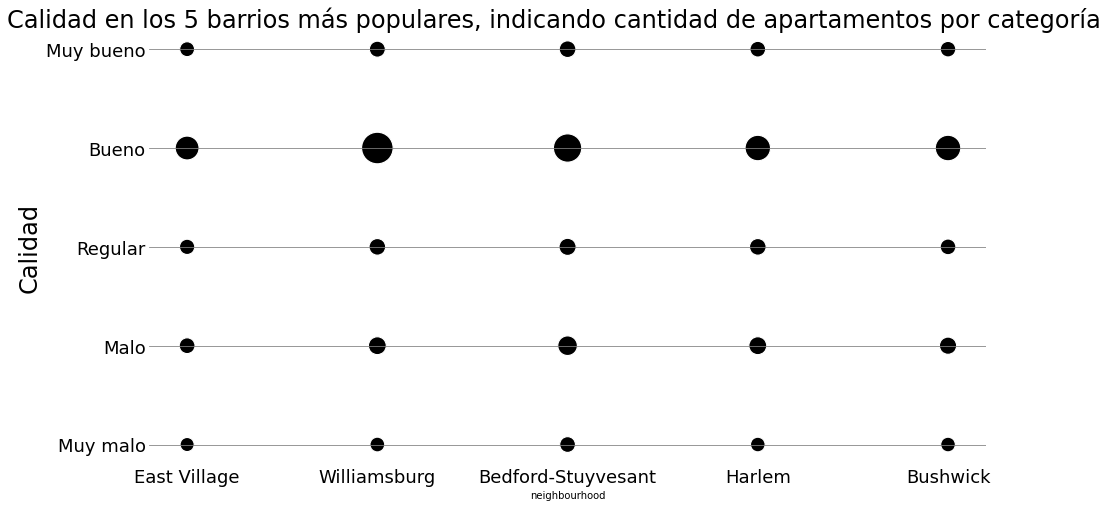

In [24]:
titulo = f"Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por categoría"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')

ordenacion_calidad = {'Muy malo':5, 'Malo':4, 'Regular':3, 'Bueno':2, 'Muy bueno':1}

sns.scatterplot(data=df_draw.sort_values(by=['classification'], key=lambda x:x.map(ordenacion_calidad)),
               x='neighbourhood',
               y='classification',
               size='id',
               sizes=(200,1000),
               color='black'
               )

ax.legend().set_visible(False)
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:f'{x:,.2f}'))

#for t in legend.texts:
#    t.set_text(t.get_text()[:3])
#ax.legend(title='apartamentos po',fontsize=24, title_fontsize=24)

sns.despine(left=True, bottom=True)
#ax.set_xlabel('Barrio',fontsize=24,weight='regular')
ax.set_ylabel('Calidad',fontsize=24,weight='regular')

#ax.set_axisbelow(False)
ax.grid(axis='y',color='gray')
ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)

f.suptitle(f'{titulo}',fontsize=24,color='black',x=.5,ha='center',y=.92)

Observamos como en cada barrio predominan los apartamentos de calidad 'Bueno'. 

A continuación, calcularemos la media de classification por cada barrio. Así podremos observar dónde queda cada uno. Agruparemos así por cantidad de apartamentos, al igual que hemos realizado anteriormente. 

In [25]:
df_draw = (df
           .query("neighbourhood in @x_barrios")
           
           .groupby('neighbourhood')['classification_num'].aggregate(['mean','count'])
           #.mean()
           .reset_index()
            )

Text(0.5, 0.92, 'Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por barrio, y clasificación numérica')

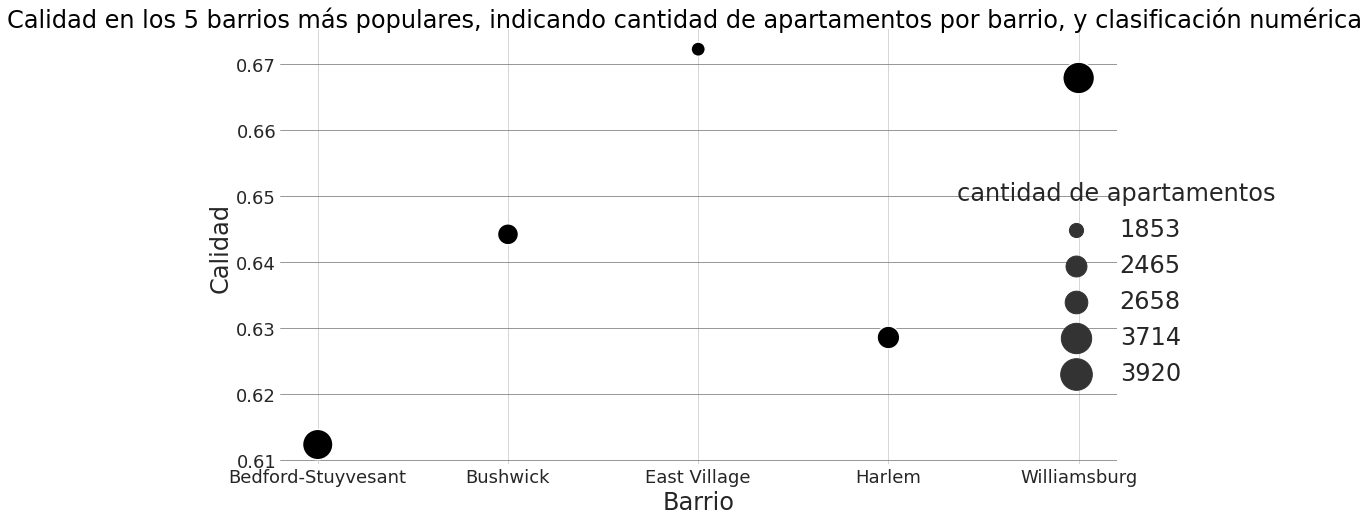

In [26]:
titulo = f"Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por barrio, y clasificación numérica"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')


sns.scatterplot(data=df_draw,
               x='neighbourhood',
               y='mean',
               size='count',
               sizes=(200,1000),
               color='black'
               )

ax.legend(fontsize=24)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:f'{v:,.2f}'))
legend = ax.legend()
for t in legend.texts:
    t.set_text(t.get_text()[:3])
ax.legend(title='cantidad de apartamentos',fontsize=24, title_fontsize=24, loc=9, bbox_to_anchor=(1,.7), frameon=False)

sns.despine(left=True, bottom=True)
ax.set_xlabel('Barrio',fontsize=24,weight='regular')
ax.set_ylabel('Calidad',fontsize=24,weight='regular')

#ax.set_axisbelow(False)
ax.grid(axis='y',color='gray')
ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)

f.suptitle(f'{titulo}',fontsize=24,color='black',x=.5,ha='center',y=.92)

In [27]:
x_barrios

['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'East Village']

Evaluación de esta gráfica: Se puede observar el sentido que ha tomado la clasificación de los 5 barrios seleccionados midiendo la popularidad/calidad, ya que: 
- Selección: todos los barrios tienen de media una clasificaión buena. 
- Ordenación: recordando el orden de los barrios 'Williamsburg' es el primero en la clasificación, y como se puede observar, es el que con más cantidad de apartamentos cuenta, seguido por 'Bedford-Stuyvesant'. 

Es decir, el barrio 'East Village' es el que mejor valoración tiene de media, sin embargo, el que menos apartamentos tiene disponible, es por eso que se busca un equilibrio, y se considera que el barrio 'Williamsburg', al tener más cantidad de apartamentos, se considera mejor. 

## Despliegue

Este tipo de gráficas es útil para representar una cantidad de información limitada, pequeña, y en este caso sólo hemos representado 5 de los 221 que hay en total. Si deseásemos ampliar esta investigación, sería necesario por tanto cambiar el tipo de representación que se está usando. Una idea útil sería representar a la vez 5 Pie Chart, y en cada uno, una clasificación, es decir: 
- Primer Pie Chart: apartamentos de clasificación muy mala 
- Segundo Pie Chart: apartamentos de clasificación mala

Y así sucesivamente. 

Ahora bien, dentro de cada uno, cada barrio se representará de un color, y de un tamaño determinado. Este tamaño se verá afectado según la cantidad de apartamentos que tengan de esa clasificación. Así se podrá observar en qué barrio predominan los apartamentos de tipo Muy malo. 

Se debe tener cuidado con las distribuciones, ya que no es lo mismo que un barrio que tenga disponible 3020 apartamentos, tenga solamente 100 muy malos, que será del mismo tamaño que otro que de 150 apartamentos, 100 son muy malos. 


#EJERCICIO 3

## Comprensión de los negocios y definición del problema

Una vez obtenida la información del apartado anterior, queremos tratar de entender las diferencias de precio entre alquilar un apartamento entero y una habitación privada. Usa los diagramas de cajas donde cada uno de los 5 barrios más populares está representado por una caja y haz una interpretación de los resultados.

## Comprensión de los datos

Este ejercicio se realizará con los 5 barrios más populares, seleccionados de nuevo en ejercicios anteriores. Reutilizaremos ese criterio en este ejericico.

Pero es importante hacer el estudio de la variable 'room_type', que no se había realizado con anterioridad.

Para ello, seguiremos la estructura que se ha estado siguiendo a lo largo de la práctica, primero estudio de los N/A, y a continuación, la distribución.

## Preparación de los datos

Nos aseguramos que en cada apartamento disponible se especifique qué tipo de habitación está disponible. 

In [28]:
room_type_nan = df_raw['room_type'].isna().sum()
print(room_type_nan)

0


Además observamos cuantos apartamentos hay de cada tipo, que lo veremos también gracias a un gráfico de barras.

In [29]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

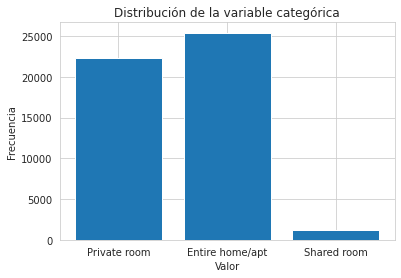

In [30]:
frecuencias = {}
for d in df['room_type']:
    if d in frecuencias:
        frecuencias[d] += 1
    else:
        frecuencias[d] = 1

# Creamos el gráfico de barras
plt.bar(frecuencias.keys(), frecuencias.values())

# Configuramos el título y los ejes
plt.title("Distribución de la variable categórica")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# Mostramos el gráfico
plt.show()

En esta plataforma, predomina el alquiler de los apartamentos enteros, seguidos de habitaciones privadas, diferenciándose por gran cantidad con el alquiler de habitaciones compartidas. 

Pero en este ejercicio, no estudiaremos el precio de las habitaciones compartidas. 

De la misma manera, estudiaremos la variable de precios. 

Observemos si cada apartamento tiene asociado un precio.

In [31]:
price_nan= df['price'].isna().sum()
price_nan

0

Como es una variable numérica, estudiaremos si encontramos algún outlier gracias a la representación boxplot. 

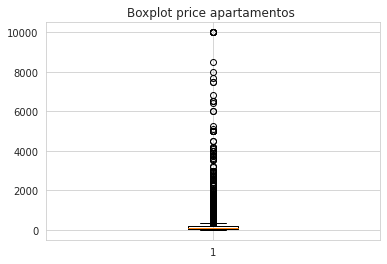

In [32]:
import matplotlib.pyplot as plt
boxplot_price=df['price']
plt.boxplot(boxplot_price)
plt.title('Boxplot price apartamentos ')
plt.show()

In [33]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_price)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

-90.0 334.0 2972


Consideramos que encontramos 2972 outliers, ya que el máximo precio considerado como aceptable, por noche, es de 334$. 

No eliminaremos estos outliers, ya que deberíamos tratar a lo particular con cada uno, ya que puede que encontremos un hogar completo, con un precio por noche de 400$ que se esté considerando como outlier. 

Simplemente los dejaremos tal y como está. 

## Modelado

Por cada barrio, representaremos dos cajas, una para alquileres de tipo habitación privada, y otra para apartamentos enteros. De esta manera estudiaremos por separado cada tipo, pudiendo así obtener las medias y todos las estadísticas necesarias, por separado.

Procedemos a obtener todos los apartamentos que se encuentren en los barrios populares, y todos los apartamentos que no sean de habitación compartida. 

In [34]:
df_draw = (df
    #.dropna()
    .query("neighbourhood in @x_barrios")
    .query("room_type!='Shared room'")
          ) 

Text(0.5, 0.92, 'Distribución precios por tipo habitación en los barrios más populares')

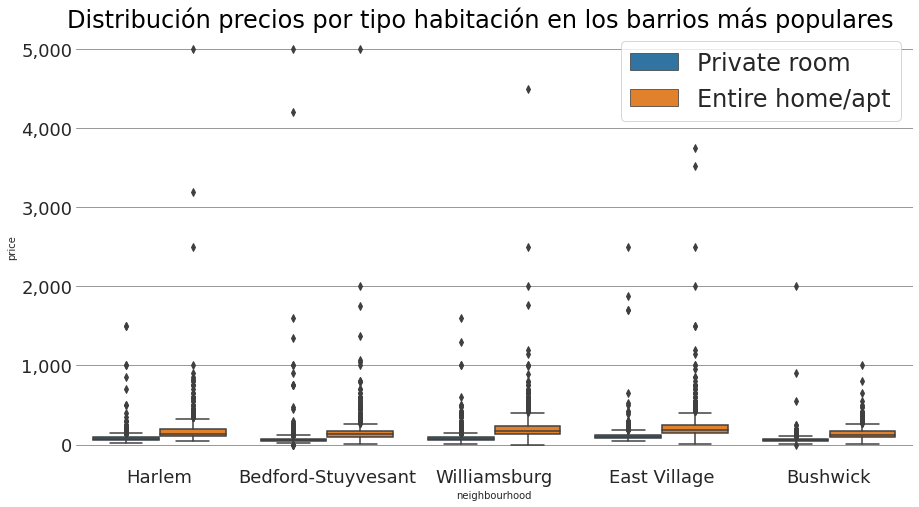

In [35]:
titulo = f"Distribución precios por tipo habitación en los barrios más populares"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')


sns.boxplot(data=df_draw,x='neighbourhood',y='price',hue='room_type')
ax.legend(fontsize=24)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v)))

sns.despine(left=True, bottom=True)
#ax.set_axisbelow(False)
ax.grid(axis='y',color='gray')
ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)

f.suptitle(f'{titulo}',fontsize=24,color='black',x=.5,ha='center',y=.92)

Como hay demasiados outliers, no se puede apreciar con claridad las gráficas. Pondremos una nueva restricción y diremos que represente aquellos cuyo precio sea menor de 500, a ver si con eso podemos visualizarlo con más claridad.

In [36]:
df_draw = (df
    #.dropna()
    .query("neighbourhood in @x_barrios")
    .query("room_type!='Shared room'")
    .query("price<500")
          ) 

Text(0.5, 0.92, 'Distribución precios por tipo habitación en los barrios más populares')

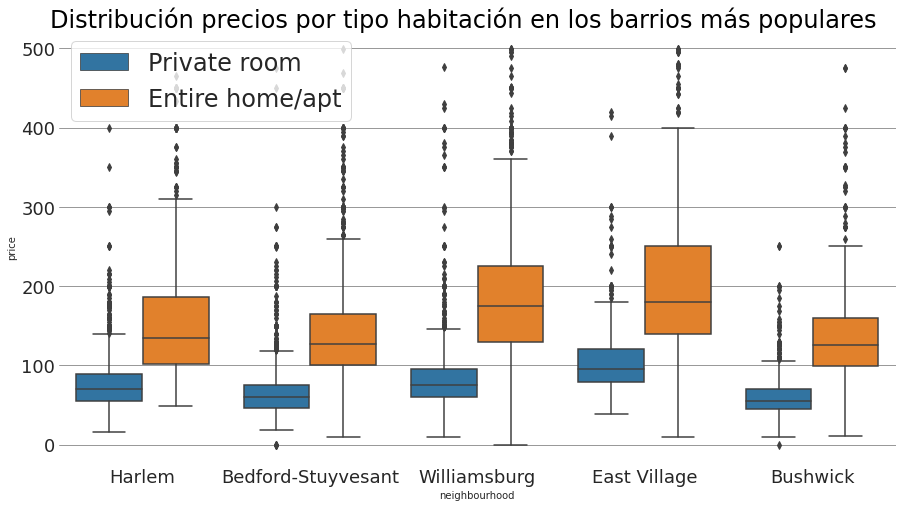

In [37]:
titulo = f"Distribución precios por tipo habitación en los barrios más populares"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')


sns.boxplot(data=df_draw,x='neighbourhood',y='price',hue='room_type')
ax.legend(fontsize=24)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v)))

sns.despine(left=True, bottom=True)
#ax.set_axisbelow(False)
ax.grid(axis='y',color='gray')
ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)

f.suptitle(f'{titulo}',fontsize=24,color='black',x=.5,ha='center',y=.92)

Visualizando de primera mano dicha gráfica, se concluye con claridad que obviamente, es más barato alquilar una sóla habitación que un apartamento entero. Pero observemos ahora las estadísticas para obtener conclusiones. 

In [38]:
df_draw.groupby(['neighbourhood','room_type'])['price'].agg(['mean','max', 'min', 'median', 'std'])

mean  max  min  median        std
neighbourhood      room_type                                               
Bedford-Stuyvesant Entire home/apt  141.260870  499   10   127.5  62.822611
                   Private room      65.127712  475    0    60.0  32.799144
Bushwick           Entire home/apt  141.667162  475   11   125.0  67.483391
                   Private room      60.722028  250    0    55.0  23.612820
East Village       Entire home/apt  200.135518  499   10   180.0  82.764557
                   Private room     105.107198  420   39    95.0  46.279699
Harlem             Entire home/apt  157.006917  465   49   135.0  74.457583
                   Private room      77.546326  399   16    70.0  35.952120
Williamsburg       Entire home/apt  187.007115  499    0   175.0  78.194876
                   Private room      82.795477  477   10    75.0  40.183176

Se puede concluir que en media, es más caro hospedarse en el barrio de 'East Village', incluso siendo 'Williamsburg' el barrio más popular, y 'East Village' el quinto.
Obviamente encontramos errores en esta base de datos, ya que hay barrios que costean 0€ por noche, lo cual puede deberse a un error, o que el apartamento en cuestión es de precio abierto, y se especifica con el casero. 

Los valores máximos parecen un poco elevados. En 'Williamsburg' por ejemplo, encuentras una diferencia de apenas 22 $ entre una habitación privada y un apartamentos entero, cosa que no tiene demasiado sentido. Puede ser un outlier como bien hemos hablado antes. 


## Despliegue

Este tipo de estadísticas es útil si se quiere ahorrar dinero, ya que podrás comparar los precios de media, y hospedarte en un barrio que esté cercano al deseado, pero más barato. 

Sería interesante comparar la media de precio de alquilar una habitación privada a un apartamento entero en Nueva York, para ello, lo graficaremos mediante dos boxplot de la misma manera que se ha realizado anteriormente. 

In [39]:
df_draw = (df
    #.dropna()
    #.query("neighbourhood in @x_barrios")
    .query("room_type!='Shared room'")
    .query("price<400")  #.groupby('neighbourhood')['classification_num'].aggregate(['mean','count'])
          ) 

Text(0.5, 0.92, 'Distribución precios por tipo habitación de media')

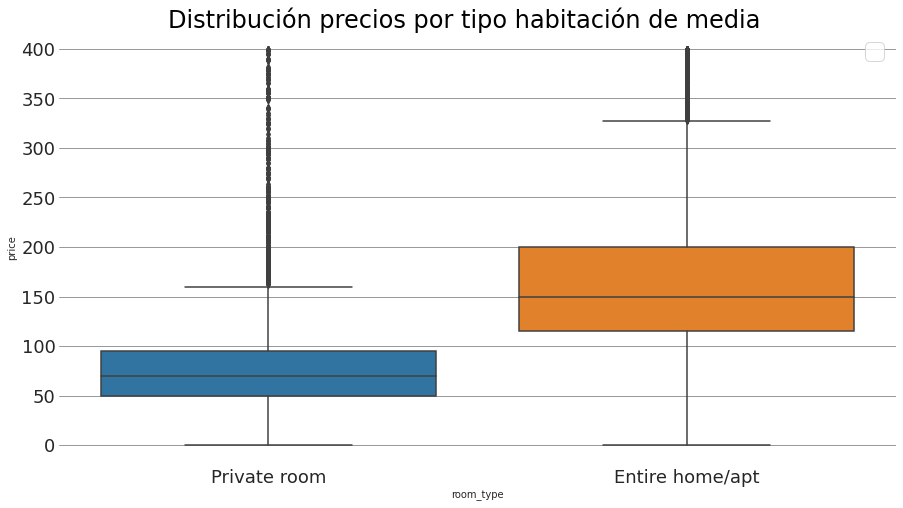

In [40]:
titulo = f"Distribución precios por tipo habitación de media"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')


sns.boxplot(data=df_draw,x='room_type',y='price')
ax.legend(fontsize=24)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v)))

sns.despine(left=True, bottom=True)
#ax.set_axisbelow(False)
ax.grid(axis='y',color='gray')
ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)

f.suptitle(f'{titulo}',fontsize=24,color='black',x=.5,ha='center',y=.92)

Aunque no aporte información nueva que no nos esperásemos, puede llegar a ser útil a la hora de organizar un viaje, poder esperarte más o menos lo que pagarás por estancia.
Si se requiere un análisis más exaustivo, se puede recurrir a la representación anterior, y adecuarlo a los barrios deseados. 

#EJERCICIO 4

## Comprensión de los negocios y definición del problema


Por último, se intuye que la tendencia a dejar reseñas en las apps que prestan servicios, ha aumentado en los últimos años. Decide que diagrama es más útil para este caso. Dibújalo y realiza una interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso.


## Comprensión de los datos


Para el objetivo propuesto, solamente haremos uso de la variable 'last_review', la cual es una variable en lista que indica la fecha de la última reseña, pero para hacer un correcto uso de esta, deberemos pasarla al formato de fecha, haciendo uso de pandas. 



##Preparación de los datos


Como se ha realizado a lo largo de la práctica, debemos estudiar la cantidad de NaN's que encontramos en esta variable, para evitar futuros problemas tanto de compilación como de comprensión.

In [41]:
date_nan = df['last_review'].isna().sum()
print(date_nan)

10052


In [42]:
num_observations = df.shape[0]
print(date_nan/num_observations)

0.20558339298496778


Estos NaN's suponen un 20% de las observaciones en total. Es un porcentaje alto, pero se debe a que en esos apartamentos no se ha realizado ninguna reseña. Anteriormente, en la variable de 'reviews_per_month' encontrábamos la misma cantidad, y los poníamos a valor 0, pero esta variable interpreta datos totalmente distintos, y sería un error sustituirlos, ya que no podemos aproximar la fecha. De todas maneras, nuestro objetivo es estudiar si el número de reseñas ha aumentado en los últimos años, por lo que si no se ha realizado ninguna, no nos aporta nada de información, posteriormente, eliminaremos dichos NaN directamente. 


## Modelado



Gracias a la librería 'datetime', pasaremos a un formato correcto la variable deseada, una vez ya se han eliminado los NaN's. 
Además, como lo que nos interesa son los años, sólo guardaremos ese dato.

In [43]:
from datetime import datetime
#borramos los NaN
df2=df.dropna()
df2.loc[:,'date']=np.nan

#pasamos a formato fecha los datos
df2['date']= pd.to_datetime(df2['last_review'])
df2['date'] = df2['date'].dt.year 
#unicamente nos interesa el año, asi que guardamos el año en la última columna
df2['date'].head

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
<ipython-input-43-b1c5c4e38726>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date']= pd.to_datetime(df2['last_review'])
<ipython-input-43-b1c5c4e38726>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

<bound method NDFrame.head of 0        2018
1        2019
3        2019
4        2018
5        2019
         ... 
48782    2019
48790    2019
48799    2019
48805    2019
48852    2019
Name: date, Length: 38821, dtype: int64>

Agrupamos según año y sumamos el número de reseñas en cada año. Para ello, creamos una nueva columna.

In [44]:
year= np.unique(df2['date'])
num_anos = len(year)
print('Número de años:', num_anos)

Número de años: 9


Podemos, entonces definir que las reseñas se reparten en 9 años, y en cada una, encontramos esa cantidad de reseñas. 

In [45]:
resenas=df2.groupby("date").reviews_per_month.sum()
print(resenas)

date
2011        0.55
2012        1.75
2013        2.79
2014       12.60
2015       96.82
2016      327.28
2017      702.67
2018     2423.12
2019    49742.55
Name: reviews_per_month, dtype: float64


In [46]:
df_=df.assign(last_review= lambda df_:pd.to_datetime(df_['last_review']))

Tomaremos como referencia el id de los apartamentos para poder contarlos y ver cuántos hay registrados en cada año, agrupando por año, y especificando la fecha del 31 de diciembre de cada uno. 

In [48]:
df_.groupby(pd.Grouper(key='last_review',freq='Y')).count().id

last_review
2011-12-31        7
2012-12-31       25
2013-12-31       48
2014-12-31      199
2015-12-31     1393
2016-12-31     2707
2017-12-31     3205
2018-12-31     6050
2019-12-31    25209
Name: id, dtype: int64

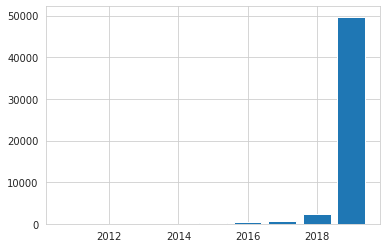

In [49]:
import matplotlib.pyplot as plot
fig, ax = plot.subplots()
ax.bar(resenas.index, resenas.values)
plot.show()

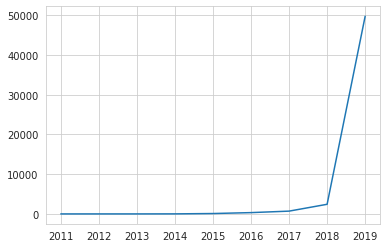

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resenas.index, resenas.values)
plt.show()

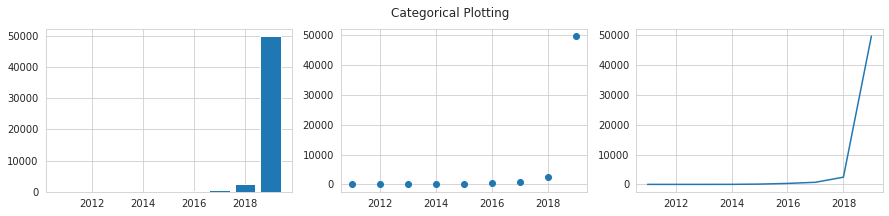

In [51]:
plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.bar(resenas.index, resenas.values)
plt.subplot(132)
plt.scatter(resenas.index, resenas.values)
plt.subplot(133)
plt.plot(resenas.index, resenas.values)
plt.suptitle('Categorical Plotting')
plt.show()

Se puede observar cómo en 2018, hubo un aumento drástico en el número de reseñas. Esto puede ser debido a que AirBnB se popularizara en esos tiempos, aumentando así el número de servicios y por tanto, de reseñas.

Fue una expansión considerable en cuestión de un año, teniendo en cuenta la gran competitividad que se encuentran en estos sectores. Tubo que hacerse hueco entre servicios populares como puede ser 'Booking' o 'Trivago'. 


## Despliegue

Esto es beneficiario para los consumidores, ya que así se pueden basar en las opiniones de otros usuarios a la hora de hacer selección de esos sevicios. Además, esto impulsa a estos servicios a tener más responsabilidad con los clientes, ya que saben que les van a evaluar, y que a día de hoy es un factor a tomar en cuenta. Trabajarán así la seguridad de sus clientes y evitar posibles estafas a los consumidores.
Tendemos a fiarnos más de aquel que tenga más reviews. Saber que una empresa mundialmente conocida vela por su seguridad, y que además los servicios prestados son fiables, gracias al resto de usuarios, es al final un método de conseguir clientes asegurados.